# Loan Status Prediction System

#### Load the library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#### Load the dataset

In [2]:
df = pd.read_csv('csv_files/train_u6lujuX_CVtuZ9i.csv')

#### Check the first five dataset

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Check Datatype for Column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Check the statistical summary

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Check for the number of Rows and Columns

In [6]:
print('Total Number of Row: {}'.format(df.shape[0]))
print('Total Number of Shape: {}'.format(df.shape[1]))

Total Number of Row: 614
Total Number of Shape: 13


#### Check the Missing Values

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Check the Percentage of Missing Values

In [8]:
(df.isnull().sum() * 100)/ len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

#### Drop the columns with missing data less than 5%

In [9]:
column = ['Loan_ID', 'Gender', 'Dependents', 'LoanAmount', 'Loan_Amount_Term']

In [10]:
df = df.dropna(subset=column)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            553 non-null    object 
 1   Gender             553 non-null    object 
 2   Married            553 non-null    object 
 3   Dependents         553 non-null    object 
 4   Education          553 non-null    object 
 5   Self_Employed      523 non-null    object 
 6   ApplicantIncome    553 non-null    int64  
 7   CoapplicantIncome  553 non-null    float64
 8   LoanAmount         553 non-null    float64
 9   Loan_Amount_Term   553 non-null    float64
 10  Credit_History     505 non-null    float64
 11  Property_Area      553 non-null    object 
 12  Loan_Status        553 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 60.5+ KB


In [11]:
(df.isnull().sum() * 100)/ len(df)

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

#### Replace columns with missing data greater 5% with mode 

In [12]:
df['Self_Employed'].value_counts()

No     451
Yes     72
Name: Self_Employed, dtype: int64

In [13]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [15]:
df['Credit_History'].mode()[0]

1.0

In [16]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [17]:
(df.isnull().sum() * 100)/ len(df)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

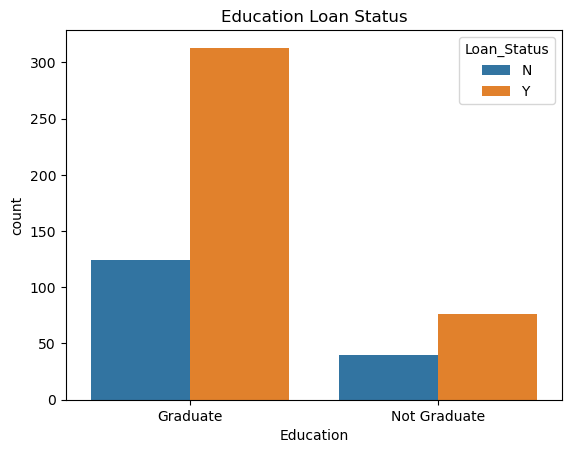

In [18]:
sns.countplot(x= 'Education', hue='Loan_Status', data=df)
plt.title('Education Loan Status')
plt.show()

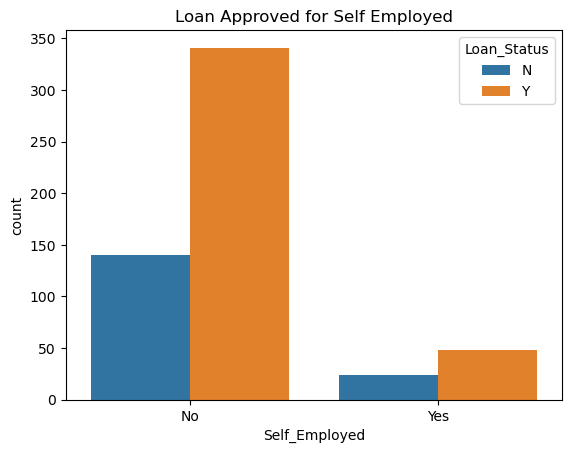

In [19]:
sns.countplot(x= 'Self_Employed', hue='Loan_Status', data=df)
plt.title('Loan Approved for Self Employed')
plt.show()

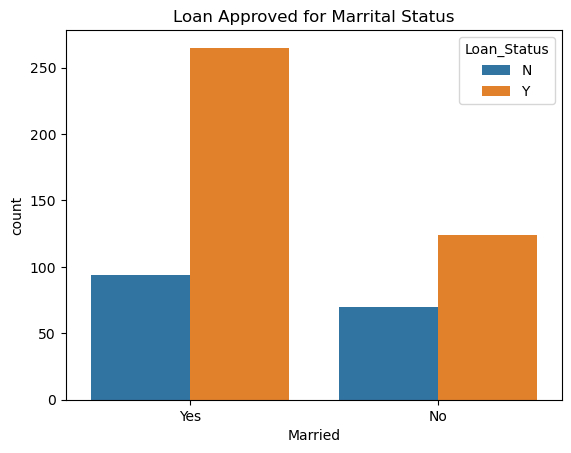

In [20]:
sns.countplot(x= 'Married', hue='Loan_Status', data=df)
plt.title('Loan Approved for Marrital Status')
plt.show()

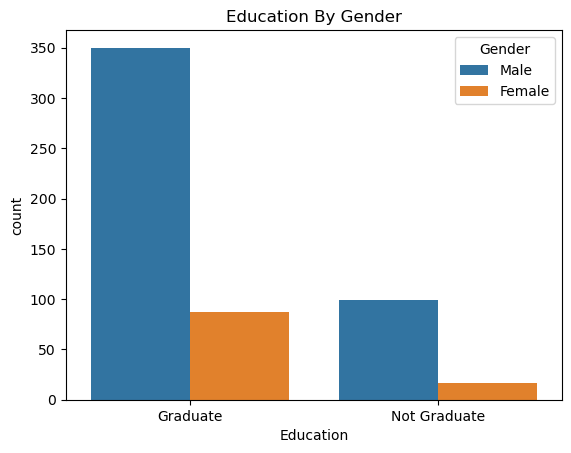

In [21]:
sns.countplot(x= 'Education', hue='Gender', data=df)
plt.title('Education By Gender')
plt.show()

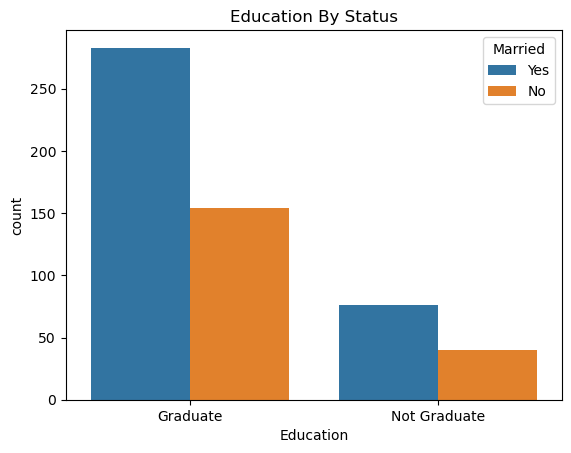

In [22]:
sns.countplot(x= 'Education', hue='Married', data=df)
plt.title('Education By Status')
plt.show()

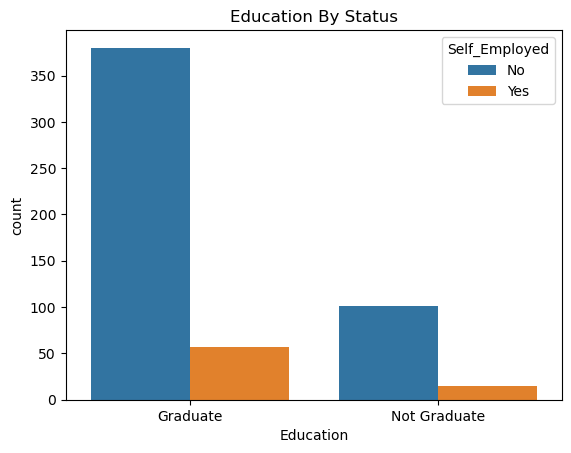

In [23]:
sns.countplot(x= 'Education', hue='Self_Employed', data=df)
plt.title('Education By Status')
plt.show()

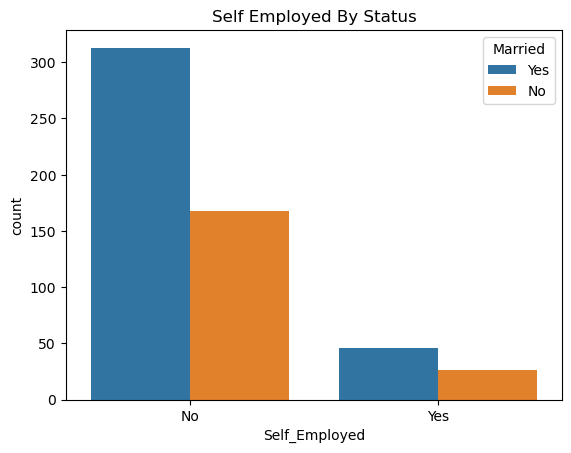

In [24]:
sns.countplot(x= 'Self_Employed', hue='Married', data=df)
plt.title('Self Employed By Status')
plt.show()

In [25]:
df['Loan_Status'].value_counts()

Y    389
N    164
Name: Loan_Status, dtype: int64

In [26]:
#df.corr()['Loan_Status'][:-1].sort_values(ascending=False).plot(kind='bar')

#### Convert categorical columns to numerical integers

In [27]:
df.sample(12)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
28,LP001086,Male,No,0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N
496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y
385,LP002237,Male,No,1,Graduate,No,3667,0.0,113.0,180.0,1.0,Urban,Y
392,LP002263,Male,Yes,0,Graduate,No,2583,2115.0,120.0,360.0,1.0,Urban,Y
204,LP001691,Male,Yes,2,Not Graduate,No,3917,0.0,124.0,360.0,1.0,Semiurban,Y
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
505,LP002622,Male,Yes,2,Graduate,No,3510,4416.0,243.0,360.0,1.0,Rural,Y
529,LP002716,Male,No,0,Not Graduate,No,6783,0.0,130.0,360.0,1.0,Semiurban,Y
358,LP002158,Male,Yes,0,Not Graduate,No,3000,1666.0,100.0,480.0,0.0,Urban,N
361,LP002170,Male,Yes,2,Graduate,No,5000,3667.0,236.0,360.0,1.0,Semiurban,Y


In [28]:
df['Dependents'] = df['Dependents'].replace(to_replace='3+', value='4')
df['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [29]:
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Education'].unique())
print(df['Self_Employed'].unique())
print(df['Property_Area'].unique())
print(df['Loan_Status'].unique())

['Male' 'Female']
['Yes' 'No']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Rural' 'Urban' 'Semiurban']
['N' 'Y']


In [30]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0}).astype('int')
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0}).astype('int')
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0}).astype('int')
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0}).astype('int')
df['Property_Area'] = df['Property_Area'].map({'Urban': 1, 'Rural': 0, 'Semiurban': 2}).astype('int')
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0}).astype('int')

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


#### Drop Load ID column

In [32]:
df.drop('Loan_ID', axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


#### Features value

In [33]:
X = df.drop('Loan_Status', axis=1)

#### Target value

In [34]:
y = df['Loan_Status']
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int32

#### Split the data into training and test sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

#### Feature Scaling

In [36]:
scaler = StandardScaler()

In [37]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [38]:
models = {
        'Logistic Regression': LogisticRegression(),
        'KNN': KNeighborsClassifier(),
        'TREE': DecisionTreeClassifier(),
        'SVM': SVC(),
        'NAIVE BAYES': GaussianNB()
}

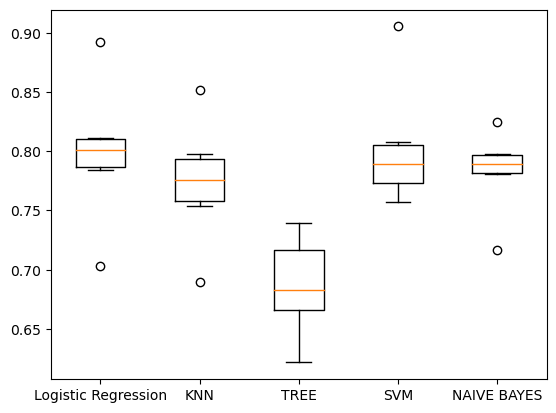

In [39]:
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_result = cross_val_score(model, scaled_X_train, y_train, cv=kf)
    results.append(cv_result)

plt.boxplot(results, labels=models.keys())
plt.show()

### Performance of Test Set

In [40]:
for name, model in models.items():
    model.fit(scaled_X_train, y_train)
    test_score = model.score(scaled_X_test, y_test)
    #y_pred = model.predict(X_test)
    y_pred = model.predict(scaled_X_test)
    print('{} Test Set Accuracy Result: {}'.format(name, test_score))

Logistic Regression Test Set Accuracy Result: 0.8018018018018018
KNN Test Set Accuracy Result: 0.7657657657657657
TREE Test Set Accuracy Result: 0.7567567567567568
SVM Test Set Accuracy Result: 0.8018018018018018
NAIVE BAYES Test Set Accuracy Result: 0.8288288288288288


In [41]:
#from sklearn import metrics
#for name, model in models.items():
 #   model.fit(scaled_X_train, y_train)
  #  test_score = model.score(scaled_X_test, y_test)
    #y_pred = model.predict(X_test)
   # y_pred = model.predict(scaled_X_test)
    #print('{} Test Set Accuracy Result: {}'.format(name, test_score))
    #print(metrics.accuracy_score(y_pred, y_test))

In [42]:
imputer = SimpleImputer()
scaler = StandardScaler()
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
tree = DecisionTreeClassifier()
naive = GaussianNB()

In [43]:
steps = [('imputer', imputer), ('scaler', scaler), ('lr', lr)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('lr', LogisticRegression())])

In [44]:
y_pred_scaled_lr = pipeline.predict(X_test)
print('Logistic Accuracy Result: {}'.format(accuracy_score(y_test, y_pred_scaled_lr)))

Logistic Accuracy Result: 0.8018018018018018


In [45]:
steps = [('imputer', imputer), ('scaler', scaler), ('knn', knn)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
y_pred_scaled_knn = pipeline.predict(X_test)
print('KNN Accuracy Result: {}'.format(accuracy_score(y_test, y_pred_scaled_knn)))

KNN Accuracy Result: 0.7657657657657657


In [46]:
steps = [('imputer', imputer), ('scaler', scaler), ('svc', svc)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
y_pred_svc = pipeline.predict(X_test)
print('SVC Accuracy Result: {}'.format(accuracy_score(y_test, y_pred_svc)))

SVC Accuracy Result: 0.8018018018018018


In [47]:
steps = [('imputer', imputer), ('scaler', scaler), ('naive', naive)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
y_pred_naive = pipeline.predict(X_test)
print('Naive Bayes Accuracy Result: {}'.format(accuracy_score(y_test, y_pred_naive)))

Naive Bayes Accuracy Result: 0.8288288288288288


### Confusion Matrix

In [48]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[15, 19],
       [ 0, 77]], dtype=int64)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.44      0.61        34
           1       0.80      1.00      0.89        77

    accuracy                           0.83       111
   macro avg       0.90      0.72      0.75       111
weighted avg       0.86      0.83      0.81       111



* 19 + 0= 19 incorrect predictions
* 15 + 77 = 92 correct predictions

### Conclusion
* Naïve Bayes algorithm is the model for predicting loan status because of its very percentage accuracy of approximately 83%

In [50]:
#csv_files/test_Y3wMUE5_7gLdaTN.csv
df_test = pd.read_csv('csv_files/test_Y3wMUE5_7gLdaTN.csv')

In [51]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [53]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [54]:
(df_test.isnull().sum() * 100)/ len(df_test)

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

### Drop the columns with missing data less than 5%

In [55]:
column_1 = ['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', '' 'Dependents', 'LoanAmount', 'Loan_Amount_Term']

In [56]:
df_test = df_test.dropna(subset=column_1)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            314 non-null    object 
 1   Gender             314 non-null    object 
 2   Married            314 non-null    object 
 3   Dependents         314 non-null    object 
 4   Education          314 non-null    object 
 5   Self_Employed      314 non-null    object 
 6   ApplicantIncome    314 non-null    int64  
 7   CoapplicantIncome  314 non-null    int64  
 8   LoanAmount         314 non-null    float64
 9   Loan_Amount_Term   314 non-null    float64
 10  Credit_History     289 non-null    float64
 11  Property_Area      314 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 31.9+ KB


In [57]:
(df_test.isnull().sum() * 100)/ len(df_test)

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       7.961783
Property_Area        0.000000
dtype: float64

### Replace columns with missing data greater 5% with mode

In [58]:
df_test['Credit_History'] = df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0])

In [59]:
(df_test.isnull().sum() * 100)/ len(df_test)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
dtype: float64

In [60]:
df_test['Salary'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']

In [61]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Salary
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276


In [62]:
df_test.shape

(314, 13)

In [63]:
df_test['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [64]:
df_test['Dependents'] = df_test['Dependents'].replace(to_replace='3+', value='4')
df_test['Dependents'].unique()

array(['0', '1', '2', '4'], dtype=object)

In [65]:
df_test['Gender'] = df_test['Gender'].map({'Male': 1, 'Female': 0}).astype('int')
df_test['Married'] = df_test['Married'].map({'Yes': 1, 'No': 0}).astype('int')
df_test['Education'] = df_test['Education'].map({'Graduate': 1, 'Not Graduate': 0}).astype('int')
df_test['Self_Employed'] = df_test['Self_Employed'].map({'Yes': 1, 'No': 0}).astype('int')
df_test['Property_Area'] = df_test['Property_Area'].map({'Urban': 1, 'Rural': 0, 'Semiurban': 2}).astype('int')

In [66]:
df_test = df_test.drop(['Loan_ID', 'Salary'], axis = 1)

In [67]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,1
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,1
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,1
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,1
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,1


In [68]:
df_test.shape

(314, 11)

In [69]:
df_test = scaler.fit_transform(df_test)

In [70]:
prediction = naive.predict(df_test)

In [71]:
print(prediction)

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
